In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

In [3]:
# Loading in Data
# Problem- Generate insight to see what are the leading factors to employees leaving company
hr_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# Ensuring that data was loading into notebook
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Viewing information about the data
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Generated summary for each numerical column
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Checked for Null in dataframe
null = pd.isnull(hr_df)

In [8]:
null

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Dropped duplicate values and ensured that no null statements were in the data
hr_df.drop_duplicates(inplace=True)
pd.isnull(hr_df).sum().sum()

0

In [10]:
# Created diameters for upcoming mouthly income boxplot. Monthly income had outliers 
Q1 = hr_df['MonthlyIncome'].quantile(0.25)
Q3 = hr_df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

<Axes: xlabel='MonthlyIncome'>

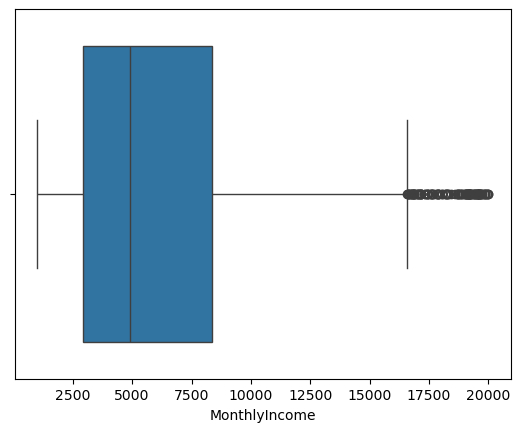

In [11]:
sns.boxplot(x=hr_df['MonthlyIncome'])

In [12]:
# Applied filter to remove outliers
hr_df = hr_df[(hr_df['MonthlyIncome'] >= lower_bound) & (hr_df['MonthlyIncome'] <= upper_bound)]

In [13]:
# Used to count each catergory in BusinessTravel column
print(hr_df['BusinessTravel'].value_counts())

BusinessTravel
Travel_Rarely        955
Travel_Frequently    262
Non-Travel           139
Name: count, dtype: int64


In [14]:
# Replaced category names with cleaner/smaller names 
hr_df['BusinessTravel'] = hr_df['BusinessTravel'].replace({
    'Travel_Rarely': 'Rarely',
    'Travel_Frequently': 'Frequently',
    'Non-Travel': 'None'
})

In [15]:
# Viewed code to ensure previous step was successful
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: xlabel='Attrition', ylabel='count'>

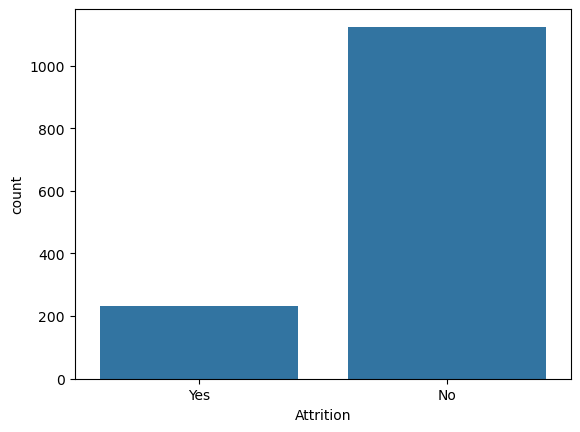

In [16]:
# Bar chart for Attrition to show how many employees left vs stayed
sns.countplot(x='Attrition', data=hr_df)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

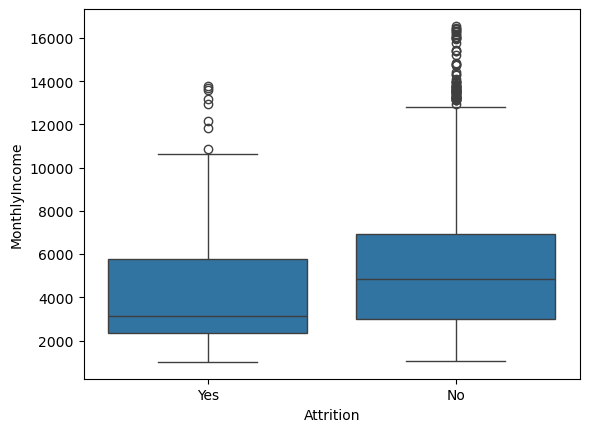

In [17]:
# Box plot comparing monthly income for empoyess who left vs stayed
sns.boxplot(x='Attrition', y='MonthlyIncome', data=hr_df)

<Axes: xlabel='OverTime', ylabel='count'>

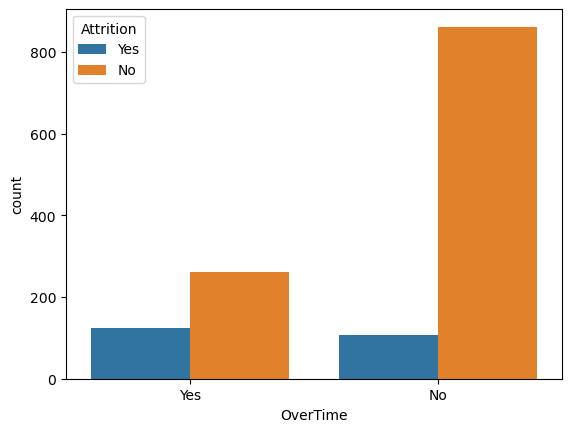

In [18]:
# countplot showing employees who worked overtime vs who did not and their attrition
sns.countplot(x='OverTime', hue='Attrition', data=hr_df)

In [19]:
# Changed caterorigal columns to binary
hr_df['Attrition'] = hr_df['Attrition'].map({'Yes': 1, 'No': 0})
hr_df['OverTime'] = hr_df['OverTime'].map({'Yes': 1, 'No': 0})
hr_df['Gender'] = hr_df['Gender'].map({'Male': 1, 'Female': 0})

In [20]:
# Encoding other categorical columns
hr_df = pd.get_dummies(hr_df, drop_first=True)

# Separated feature varibles and target varible 
X = hr_df.drop('Attrition', axis=1)
y = hr_df['Attrition']

# Split data into trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Checked for nans before running logistic model (was having huge troubles until I reran my entire code)
print(X_train.isnull().sum().sum())

0


In [22]:
# Fill any nan vales with 0
X_train = X_train.fillna(0) 

In [23]:
# Scaled the data for convergence and fit for the upcoming logistic model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Trained logistic model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       336
           1       0.76      0.45      0.57        71

    accuracy                           0.88       407
   macro avg       0.83      0.71      0.75       407
weighted avg       0.87      0.88      0.87       407



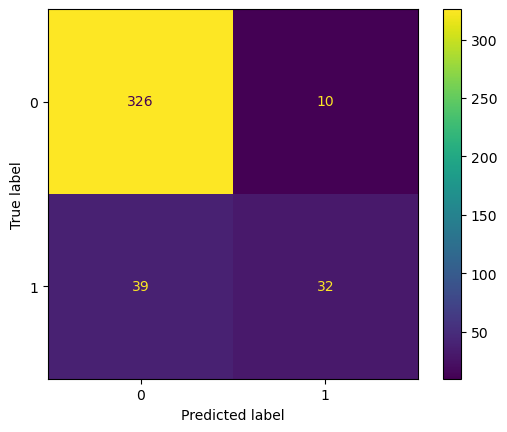

In [25]:
# Evaluted model to show precision, recall, accuary, Confusion Matrix, and F1-score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)

In [26]:
# Chose Logistic Regression model because my target variable "Attrition" is binary and not continous 

In [27]:
# Selected relevatnt features that may impact Attrition
features = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany', 'OverTime', 'Attrition']
df_cluster = hr_df[features].copy()
df_cluster

,Age,MonthlyIncome,JobSatisfaction,YearsAtCompany,OverTime,Attrition
0,41,5993,4,6,1,1
1,49,5130,2,10,0,0
2,37,2090,3,0,1,1
3,33,2909,3,8,1,0
4,27,3468,2,2,0,0
...,...,...,...,...,...,...
1465,36,2571,4,5,0,0
1466,39,9991,1,7,0,0
1467,27,6142,2,6,1,0
1468,49,5390,2,9,0,0


In [30]:
# Nomalized varibles, excluding target varible 'Attrition'
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster.drop('Attrition', axis=1))

In [31]:
# Determined reasonable number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

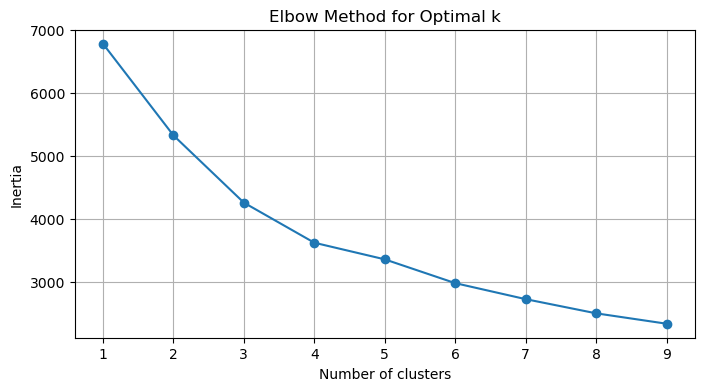

In [32]:
# Plotted Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [33]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_features)

In [34]:
#PCA for data visulizations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_cluster['PCA1'] = pca_result[:, 0]
df_cluster['PCA2'] = pca_result[:, 1]

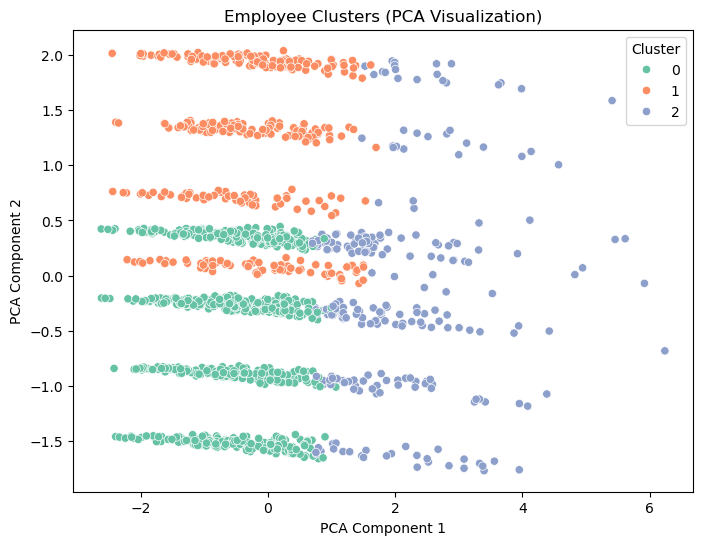

In [35]:
# Plotted clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Employee Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [36]:
# Genetaed silhouette score to see how well data points fit into clusters. Logistic Model performed better
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, df_cluster['Cluster'])
print(f"\nSilhouette Score: {score:.3f} (Closer to 1 is better)")


Silhouette Score: 0.278 (Closer to 1 is better)


In [37]:
# Setting up decision tree to interpret clusters 
X_tree = df_cluster[features[:-1]] 
y_tree = df_cluster['Cluster']

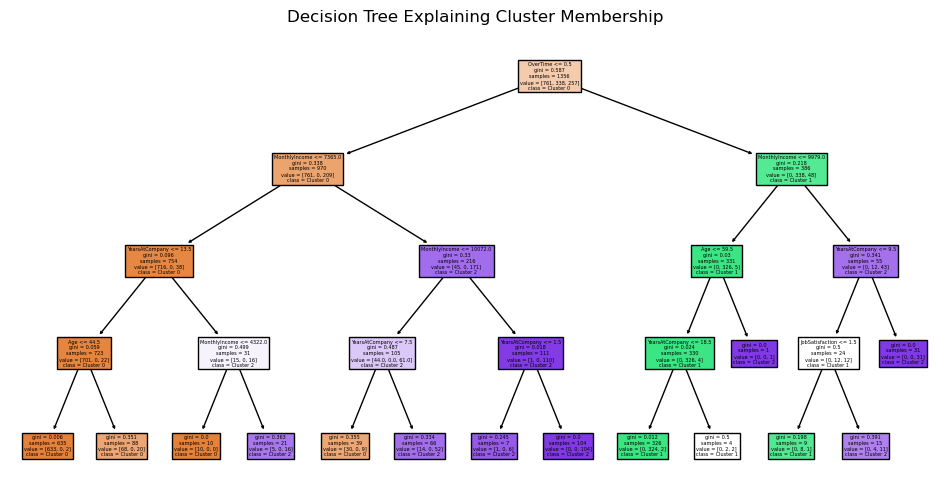

In [38]:
# Decsion tree to show which varible strongly influenced cluster/attrution rate. 'Overtime is at the top'
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_tree, y_tree)
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X_tree.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'], filled=True)
plt.title('Decision Tree Explaining Cluster Membership')
plt.show()

In [39]:
# High risk group of leaving company is low-income and high overtime

In [40]:
# References
# Microsoft Copilot for assistance
# Youtube
# Canvas course videos 